## What is scikit-learn?

Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.


## Data in scikit-learn

Data in scikit-learn, with very few exceptions, is assumed to be stored as a two-dimensional array, of shape \[n_samples, n_features\].

- **n_samples** : The number of samples: each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.

- **n_features** : The number of features or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be Boolean or discrete-valued in some cases.



## General Machine Learning Steps

1. Data collection, preprocessing (e.g., integration, cleaning, etc.), and exploration:
    - Split a dataset into the training and testing datasets
2. Model development:
    - Assume a model $\mathcal F: \{f_1, f_2, \cdots \}$ that is a collection of candidate functions  $\mathcal f$ Let's assume that each  $\mathcal f$ is parametrized by $\mathcal w$.
    - Define a cost function $\mathcal C(w)$ that measures "how good a particular $\mathcal f$ can explain the training data". The lower the cost function the better.
3. Training: employ an algorithm that finds the best (or good enough) function $\mathcal f^∗$ in the model that minimizes the cost function over the training dataset
4. Testing: evaluate the performance of the learned $\mathcal f^∗$ using the testing dataset.
5. Apply the model in the real world.

> The data is presented to the algorithm usually as a two-dimensional array (or matrix) of numbers. Each data point (also known as a sample or training instance) that we want to either learn from or make a decision on is represented as a list of numbers, a so-called feature vector, and its containing features represent the properties of this point.

> In classification, the label is discrete, such as "spam" or "no spam". In other words, it provides a clear-cut distinction between categories. Furthermore, it is important to note that class labels are nominal, not ordinal variables. Nominal and ordinal variables are both subcategories of categorical variable. Ordinal variables imply an order, for example, T-shirt sizes "XL > L > M > S". On the contrary, nominal variables don't imply an order, for example, we (usually) can't assume "orange > blue > green".

## Cat classifier - Reference to Andrew Ng's course on coursera.
The dataset contains pictures of cat and other stuff. Each X represent a single image, and the label of each image is decribed as follow.
- 0 : non-cat
- 1 : cat


In [101]:
%matplotlib inline
import numpy as np
import sklearn
import matplotlib.pyplot as plt

train_X = np.load('train_X.npy')
train_Y = np.load('train_Y.npy')
test_X = np.load('test_X.npy')
test_Y = np.load('test_Y.npy')


print("train_X shape: {}".format(train_X.shape))
print("train_Y shape: {}".format(train_Y.shape))
print("test_X shape: {}".format(test_X.shape))
print("test_Y shape: {}".format(test_Y.shape))
#print(train_X[0])

train_X shape: (209, 64, 64, 3)
train_Y shape: (209,)
test_X shape: (50, 64, 64, 3)
test_Y shape: (50,)


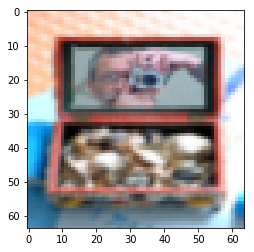

In [102]:
# Feel free to change the index
index = 15
plt.imshow(train_X[index])

In [103]:
# Reshape the training and test data sets so that images of size (64, 64, 3) are flattened into single 
# vectors of shape (64 * 64 * 3, 1).
num_train = train_X.shape[0]
num_test = test_X.shape[0]
flatten_train_X = train_X.reshape(num_train,-1)
flatten_test_X = test_X.reshape(num_test, -1)

print("Flatten train_X shape: {}".format(flatten_train_X.shape))
print("Flatten test_X shape: {}".format(flatten_test_X.shape))
#print(flatten_train_X[0,:10])

# To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the 
# pixel value is actually a vector of three numbers ranging from 0 to 255.
# One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract 
# the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole 
# numpy array. 
#
# But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the 
# dataset by 255 (the maximum value of a pixel channel).


Flatten train_X shape: (209, 12288)
Flatten test_X shape: (50, 12288)



Here we divide each image by 255, and his operation is called normalization. After dividing the image by 255, the original value of color will be rescaled to 0~1. By normalizing the data, the optimization algorithms will be able to find the optimal more efficiently.
    

In [104]:
norm_train_X = flatten_train_X / 255
norm_test_X = flatten_test_X / 255

In [105]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(norm_train_X, train_Y)
print(clf.score(norm_train_X, train_Y))
print(clf.score(norm_test_X, test_Y))

1.0
0.72


Model prediction: [1]


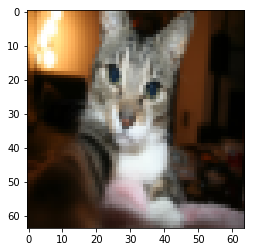

In [106]:
index = 25
print("Model prediction: {}".format(clf.predict(norm_test_X[index].reshape(1,-1))))
plt.imshow(test_X[index])

##  [Kaggle - Pokémon for Data Mining and Machine Learning](https://www.kaggle.com/alopez247/pokemon)
The Pokemon dataset uses the HP, attack, defense...etc to predict the type of Pokemon. The label is the Type_1 column and the rest columns are treated as features.  
  
The example below utilized the Python package called Pandas to parse and read CSV-liked input data. The basic usage is listed below.
- [Pandas basic usage](https://pandas.pydata.org/)


In [107]:
import pandas as pd
df = pd.read_csv('pokemon_alopez247.csv')
print("Classes of type_1: {}".format(df['Type_1'].unique()))
print("Classes of Body_Style: {}".format(df['Body_Style'].unique()))
df.head(5)

Classes of type_1: ['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground' 'Fairy'
 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel' 'Flying']
Classes of Body_Style: ['quadruped' 'bipedal_tailed' 'insectoid' 'serpentine_body' 'four_wings'
 'two_wings' 'bipedal_tailless' 'head_legs' 'head_base' 'multiple_bodies'
 'several_limbs' 'head_arms' 'with_fins' 'head_only']


,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


## Convert Categorical Features to Numeric Features

- **Ordinal Values**
> Generation
- **Nominal Values**
> Color, Type

Different preprocessing method deployed to **Color** and **Type_1** columns:

1. **Color**:
    * Here, we're trying to demonstrate one-hot encoding, which transform the numeric features to combinations of 0s and 1. Using numeric features to represent category will confuse the classifier since 0 and 1 are closer than 0 and 2. But Green and Red is not closer than Green and Black.  
  
2. **Type_1**:
    * We didn't transform Type_1 as one-hot due to the fact that Type_1 would be used as label. The classifier we presented in this example is SVM, and SVM takes 0, 1, 2, 3... as different categories. As a result we only transform the string categories to numbers.
    * Here, we merged similar types into the same categories as presented below.
    
|  Type_1  |  catogory  |
|--------|---------|
|Grass|1|
|Fire|2|
|Water+Ice|3|
|Bug|4|
|Normal|5|
|Poison + Ghost + Dark|6|
|Electric|7|
|Ground + Rock|8|
|Flying + Fairy + Dragon|9|
|Fighting + Psychic + Steel|10|

In [108]:
mapping_dictionary = {"Type_1":{ 'Grass': 1, 'Fire': 2, 'Water': 3, 'Bug': 4, 'Normal': 5, 'Poison': 6, 'Electric': 7, 'Ground': 8, 'Fairy': 9, 
 'Fighting': 10, 'Psychic': 10, 'Rock': 8, 'Ghost': 6, 'Ice': 3, 'Dragon': 9, 'Dark':6, 'Steel': 10, 'Flying': 9}}
df = df.replace(mapping_dictionary) # 透過 replace function 可以方便地把字串改為對應的數字
df["isLegendary"] = df["isLegendary"].astype(int) # Boolean to int
df["hasMegaEvolution"] = df["hasMegaEvolution"].astype(int)

dummy_df = pd.get_dummies(df['Color'])  ## one-hot encoding
df = pd.concat([df, dummy_df], axis=1)
df = df.drop('Color', axis=1)
df.head(5)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Black,Blue,Brown,Green,Grey,Pink,Purple,Red,White,Yellow
0,1,Bulbasaur,1,Poison,318,45,49,49,65,65,...,0,0,0,1,0,0,0,0,0,0
1,2,Ivysaur,1,Poison,405,60,62,63,80,80,...,0,0,0,1,0,0,0,0,0,0
2,3,Venusaur,1,Poison,525,80,82,83,100,100,...,0,0,0,1,0,0,0,0,0,0
3,4,Charmander,2,NaN,309,39,52,43,60,50,...,0,0,0,0,0,0,0,1,0,0
4,5,Charmeleon,2,NaN,405,58,64,58,80,65,...,0,0,0,0,0,0,0,1,0,0


In [109]:
df.describe() # description of the dataset only for numeric feature

,Number,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,...,Black,Blue,Brown,Green,Grey,Pink,Purple,Red,White,Yellow
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,...,721.000000,721.000000,721.000000,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,5.396671,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,...,0.044383,0.185853,0.152566,0.10957,0.095700,0.056865,0.090153,0.104022,0.072122,0.088766
std,208.27906,2.852034,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,...,0.206087,0.389258,0.359818,0.31257,0.294384,0.231746,0.286599,0.305501,0.258869,0.284603
min,1.00000,1.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,181.00000,3.000000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,361.00000,5.000000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,541.00000,8.000000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,721.00000,10.000000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
# Data shape
df.shape

(721, 32)

In [111]:
## drop column because it if irrelevant to the results
   
df = df.drop(['Number','Name', 'Type_2', 'Egg_Group_1', 'Egg_Group_2', 'hasGender', 'Body_Style'],axis=1)
df.head(5)

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,...,Black,Blue,Brown,Green,Grey,Pink,Purple,Red,White,Yellow
0,1,318,45,49,49,65,65,45,1,0,...,0,0,0,1,0,0,0,0,0,0
1,1,405,60,62,63,80,80,60,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,525,80,82,83,100,100,80,1,0,...,0,0,0,1,0,0,0,0,0,0
3,2,309,39,52,43,60,50,65,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2,405,58,64,58,80,65,80,1,0,...,0,0,0,0,0,0,0,1,0,0


In [112]:
# Data shape after drop column
df.shape

(721, 25)

In [113]:
# classes count of type_1
# mind unbalanced data distribution
df['Type_1'].value_counts()

3     128
10     94
5      93
6      79
8      71
1      66
4      63
2      47
9      44
7      36
Name: Type_1, dtype: int64

## Missing value

There are many methods to deal with missing value such as dorpping the feature/sample, or giving values by zero/column mean/interpolation. There is not always right way to do, it depends upon your domain knowledge or experiences.

In [114]:
## Missing value
print(df.isnull().sum()) # Pr_Male has 77 missing value
df.dropna(axis=1, inplace=True)
df.shape

Type_1               0
Total                0
HP                   0
Attack               0
Defense              0
Sp_Atk               0
Sp_Def               0
Speed                0
Generation           0
isLegendary          0
Pr_Male             77
hasMegaEvolution     0
Height_m             0
Weight_kg            0
Catch_Rate           0
Black                0
Blue                 0
Brown                0
Green                0
Grey                 0
Pink                 0
Purple               0
Red                  0
White                0
Yellow               0
dtype: int64


(721, 24)

In [115]:
# We need all features are numeric, check if there still has dtype = object
df.dtypes.value_counts()

int64      12
uint8      10
float64     2
dtype: int64

In [116]:
# Finally check whether all features are done by the steps we described above.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 24 columns):
Type_1              721 non-null int64
Total               721 non-null int64
HP                  721 non-null int64
Attack              721 non-null int64
Defense             721 non-null int64
Sp_Atk              721 non-null int64
Sp_Def              721 non-null int64
Speed               721 non-null int64
Generation          721 non-null int64
isLegendary         721 non-null int64
hasMegaEvolution    721 non-null int64
Height_m            721 non-null float64
Weight_kg           721 non-null float64
Catch_Rate          721 non-null int64
Black               721 non-null uint8
Blue                721 non-null uint8
Brown               721 non-null uint8
Green               721 non-null uint8
Grey                721 non-null uint8
Pink                721 non-null uint8
Purple              721 non-null uint8
Red                 721 non-null uint8
White               721 non-null 

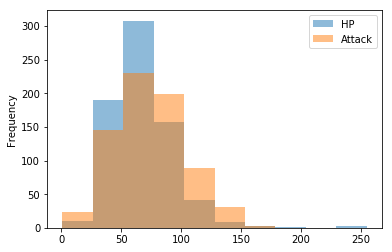

In [117]:
## Also you can draw histgram using pandas
df[['HP', 'Attack']].plot.hist(alpha=0.5)

In [118]:
## Split data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

def get_arrays(df):
    X = np.array(df.iloc[:,1:])
    y = np.array(df['Type_1'])
    return X, y


In [119]:
train_X, train_Y = get_arrays(df_train)
test_X, test_Y = get_arrays(df_test)
scaler = StandardScaler()
svc = SVC(C=5, gamma=0.04)
clf = Pipeline([('scaler', scaler), ('svc', svc)])
clf.fit(train_X, train_Y)
print("Accuracy: {}".format(clf.score(train_X, train_Y)))
print("Accuracy: {}".format(clf.score(test_X, test_Y)))

Accuracy: 0.7430555555555556
Accuracy: 0.41379310344827586


## Exercise - Build a classifier on stock data (predict a stock will rise(1) or not(0))

- Please refer to week03_classifier/stock_system.ipynb for detailed illustraion.
- Load the data in the stock directory.
- Choose a classifier in sklearn package(SVC, decision tree, KNN, MLP, etc.)
- Make the predictions on test data and report the results.
- Raw data is in "/home/mlb/res/stock/twse/raw/"  or json data is in "/home/mlb/res/stock/twse/json/"
- Feature set consists of thirty features(six features each day, high price 高點, low price 低點, open price 開盤價, close price 收盤價, adjust_close 最高最低價, volume 成交量).

In [120]:
# note:
# We already parse raw data and save it to npy format
# for you.This exercise is only for you to build a 
# model conveniently. Please parse raw data and preprocess
# it for your own model in stock simulation.

stock_train_X = np.load('stock/train_X.npy') # train 2017-05-01 ~ 2017-05-31
stock_train_Y = np.load('stock/train_Y.npy')
stock_test_X = np.load('stock/test_X.npy') # test 2017-06-01 ~ 2017-06-30
stock_test_Y = np.load('stock/test_Y.npy')

# ... build your own classifier with module in sklearn or other lib

print(stock_train_Y[:5])

[1 1 0 0 0]


# Reference to  Andrew Ng, Professor Lin 's course on coursera and Professor Wu in NTHU.